In [1]:
import sys
sys.path.append("..")
#from collections import Counter

#import numpy as np
import matplotlib.pyplot as plt
from hypergraphx.generation.random import *
from hypergraphx.measures.eigen_centralities import *
np.random.seed(123)

# SVG OUTPUT for plots
%config InlineBackend.figure_format = 'svg'

In [2]:
HG = random_hypergraph(5, {2:7 , 3: 5, 4: 3})

In [3]:
HG.is_uniform()

False

In [4]:
HG = HG.get_edges(order=3, subhypergraph=True)
HG.is_uniform(), HG.is_connected()

(True, True)

In [5]:
HG.get_edges()

[(0, 1, 3, 4), (0, 1, 2, 3)]

In [6]:
# it work just for uniform hypergraphs
def CEC_centrality(HG):
    '''
    Compute the CEC centrality for uniform hypergraphs.

    Parameters
    ----------
    
    HG : Hypergraph
        The uniform hypergraph on which the CEC centrality is computed.
    
    Returns
    -------
    cec : dict 
        The dictionary of keys nodes of HG and values the CEC centrality of the node.

        
    References
    ----------
    Three Hypergraph Eigenvector Centralities,
    Austin R. Benson,
    https://doi.org/10.1137/18M1203031  
    
    '''

    # check if the hypergraph is uniform, use raise exception
    if not HG.is_uniform():
        raise Exception("The hypergraph is not uniform.")
    # check if HG is connected, use raise exception
    if not HG.is_connected():
        raise Exception("The hypergraph is not connected.")
    # define W, matrix N x N where i,j is the number of common edges between i and j
    W = np.zeros((HG.num_nodes(), HG.num_nodes()))
    order = len(HG.get_edges()[0])
    for edge in HG.get_edges():
        for i in range(order):
            for j in range(i + 1, order):
                W[edge[i], edge[j]] += 1
                W[edge[j], edge[i]] += 1
    # compute the dominant eigenvector of W
    eigval, eigvec = np.linalg.eig(W)
    # return a dictionary of keys nodes of HG and values the corresponding element of the dominant eigenvector
    dominant_eig = eigvec[:, np.argmax(eigval)]
    return {node: dominant_eig[node] for node in range(HG.num_nodes())}



In [7]:
# for a HG of order m, create a tensor of order m+1 where i,j,k... is 1 if the hyperedge (i,j,k...) is in HG and 0 otherwise
def adjacency_tensor(HG):
    '''
    Compute the tensor of a uniform hypergraph.

    Parameters
    ----------
    
    HG : Hypergraph
        The uniform hypergraph on which the tensor is computed.
    
    Returns
    -------
    T : np.ndarray
        The tensor of the hypergraph.
    '''
    # check if the hypergraph is uniform, use raise exception
    if not HG.is_uniform():
        raise Exception("The hypergraph is not uniform.")
    
    order = len(HG.get_edges()[0]) -1
    # create a tensor order dimensional tensor
    T = np.zeros((HG.num_nodes(),)*(order+1))
    # for each hyperedge in HG
    for edge in HG.get_edges():
        # set to 1 the corresponding element of T and all the permutations of the hyperedge
        from itertools import permutations
        for perm in permutations(edge):

            T[tuple(perm)] = 1
            
    return T

# compute the dominant eigenvector of the tensor with iterative method
# def tensor_dominant_eigenvector(T):
#     '''
#     Compute the dominant eigenvector of a tensor.

#     Parameters
#     ----------
    
#     T : np.ndarray
#         The tensor on which the dominant eigenvector is computed.
    
#     Returns
#     -------
#     dominant_eig : np.ndarray
#         The dominant eigenvector of the tensor.
#     '''

#     check_list = []
#     v = np.random.rand(np.shape(adjacency_tensor(HG))[0])
#     v = v / sum(v)  
    
#     for iter in range(100):
#         aux = T @ v
#         for i in range(len(np.shape(adjacency_tensor(HG)))-2):
#             aux = (aux @ v ).copy()
#         #v = aux / sum(aux)
#         check_list.append(aux)
#     return check_list

In [8]:
adj_T = adjacency_tensor(HG)


/Users/francesco/PycharmProjects/hypergraphx/venv/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0, 0.5, 'Centrality')

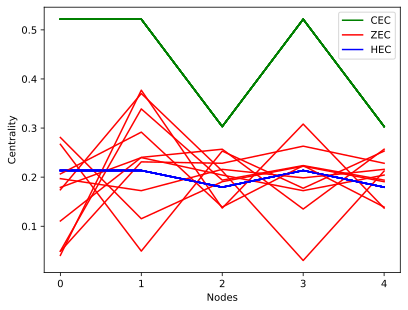

In [9]:
for i in range(10):
    plt.plot(CEC_centrality(HG).values(), c= 'g', label='CEC')
    plt.plot(ZEC_centrality(HG).values(), c= 'r', label='ZEC')
    plt.plot(HEC_centrality(HG).values(), c= 'b', label='HEC')

plt.legend(['CEC', 'ZEC', 'HEC'])
# x ticks are nodes
plt.xticks(range(HG.num_nodes()));
plt.xlabel('Nodes')
plt.ylabel('Centrality')